In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
import os
currdir = os.getcwd()

In [3]:
os.listdir(currdir)

['.ipynb_checkpoints',
 '740_1375_compressed_Chicago_Crimes_2001_to_2004.csv.zip',
 '740_1375_compressed_Chicago_Crimes_2005_to_2007.csv.zip',
 '740_1375_compressed_Chicago_Crimes_2008_to_2011.csv.zip',
 'aclImdb',
 'aclImdb.zip',
 'Avocado Price Prediction.ipynb',
 'avocado.csv',
 'CaliforniPricePrediction.ipynb',
 'Car Price Prediction.ipynb',
 'Car_Purchasing_Data.csv',
 'ChicagoCrimeRatePredictions.ipynb',
 'Chicago_Crimes_2001_to_2004.csv',
 'Chicago_Crimes_2005_to_2007.csv',
 'Chicago_Crimes_2008_to_2011.csv',
 'cifar-10-python.tar.gz',
 'CIFAR10.ipynb',
 'cifar10_model_1.h5',
 'Codalab',
 'datasets',
 'glove.6B.zip',
 'gloveDir',
 'Hackerearth',
 'jena_climate_2009_2016.csv',
 'jena_climate_2009_2016.csv.zip',
 'Kaggle',
 'MNIST Dataset classification.ipynb',
 'pre_trained_glove_model.h5',
 'TemperatureForecasting.ipynb',
 'traffic-signs-data',
 'TrafficSignClassification.ipynb',
 'Untitled.ipynb']

In [4]:
##loading our dataset
with open("./traffic-signs-data/train.p",mode = 'rb') as training_data:
    training = pickle.load(training_data,encoding='utf8')
with open("./traffic-signs-data/valid.p",mode = 'rb') as validation_data:
    validation = pickle.load(validation_data,encoding='utf8')
with open("./traffic-signs-data/test.p",mode = 'rb') as testing_data:
    testing = pickle.load(testing_data,encoding='utf8')

In [5]:
print(training.keys())

dict_keys(['coords', 'labels', 'features', 'sizes'])


In [6]:
training['features'].shape

(34799, 32, 32, 3)

In [7]:
x_train , y_train = training['features'] , training['labels'] 
x_validation , y_validation = validation['features'] , validation['labels']
x_test , y_test = testing['features'] , testing['labels']

In [8]:
print(x_train.shape , y_train.shape)

(34799, 32, 32, 3) (34799,)


In [9]:
print(x_validation.shape , y_validation.shape)

(4410, 32, 32, 3) (4410,)


In [10]:
print(x_test.shape , y_test.shape)

(12630, 32, 32, 3) (12630,)


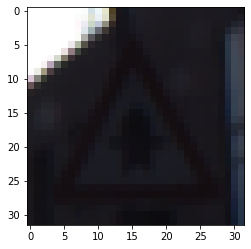

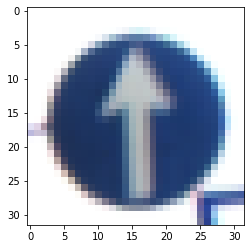

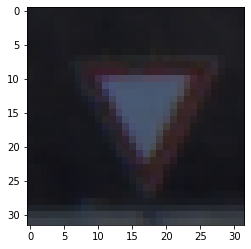

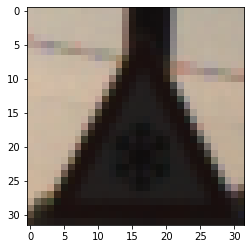

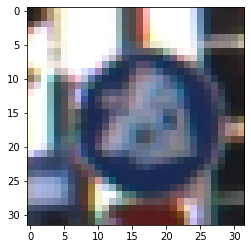

In [11]:
from random import randint

for i in range(5):
    idx = randint(0,len(x_train))
    plt.figure()
    plt.imshow(x_train[idx])


In [12]:
from sklearn.utils import shuffle
x_train , y_train = shuffle(x_train,y_train)

In [13]:
x_train_gray = np.sum(x_train/3 , axis = 3 , keepdims = True)
x_validation_gray = np.sum(x_validation/3 , axis = 3 , keepdims = True)
x_test_gray = np.sum(x_test/3 , axis = 3 , keepdims = True)

In [14]:
x_train_gray = (x_train_gray - 128)/128
x_validation_gray = (x_validation_gray - 128)/128
x_test_gray = (x_test_gray - 128)/128

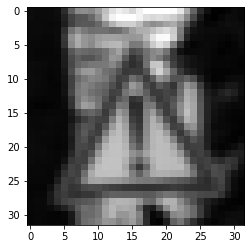

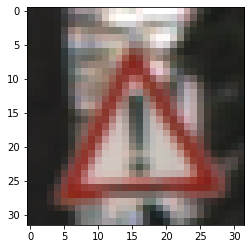

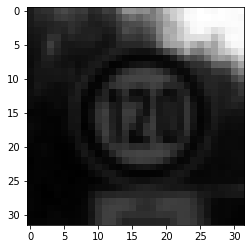

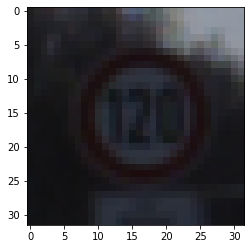

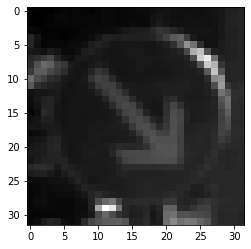

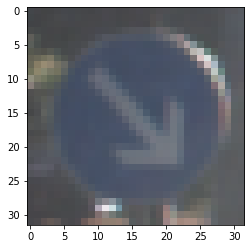

In [15]:
for i in range(3):
    idx = randint(0,len(x_train_gray))
    plt.figure()
    plt.imshow(x_train_gray[idx].squeeze() , cmap = 'gray')
    plt.figure()
    plt.imshow(x_train[idx])

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , AveragePooling2D , Dense , Flatten , Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [17]:
model = Sequential()

model.add(Conv2D(filters = 6,kernel_size=(5,5) , activation = 'relu' , input_shape = (32,32,1)))
model.add(AveragePooling2D())
model.add(Conv2D(filters = 16,kernel_size=(5,5) , activation = 'relu'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(120,activation = 'relu'))
model.add(Dense(84,activation = 'relu' ))
model.add(Dense(43,activation = 'softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [19]:
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = Adam(lr = 1e-4) , metrics = ['acc'])

In [20]:
history = model.fit(x_train_gray , y_train , batch_size=128 , epochs=64 , validation_data=(x_validation_gray,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/64
34799/34799 [==============================] - 4s 107us/step - loss: 3.4253 - acc: 0.1220 - val_loss: 3.3747 - val_acc: 0.1472
Epoch 2/64
34799/34799 [==============================] - 2s 59us/step - loss: 2.8726 - acc: 0.2674 - val_loss: 2.7705 - val_acc: 0.3134
Epoch 3/64
34799/34799 [==============================] - 2s 60us/step - loss: 2.1862 - acc: 0.4343 - val_loss: 2.1894 - val_acc: 0.4075
Epoch 4/64
34799/34799 [==============================] - 2s 59us/step - loss: 1.7089 - acc: 0.5481 - val_loss: 1.8263 - val_acc: 0.5136
Epoch 5/64
34799/34799 [==============================] - 2s 61us/step - loss: 1.4212 - acc: 0.6110 - val_loss: 1.6079 - val_acc: 0.5610
Epoch 6/64
34799/34799 [==============================] - 2s 60us/step - loss: 1.2224 - acc: 0.6637 - val_loss: 1.4544 - val_acc: 0.5694
Epoch 7/64
34799/34799 [==============================] - 2s 59us/step - loss: 1.0781 - acc: 0.7041 - val_loss: 1.3113 - val_acc

34799/34799 [==============================] - 2s 58us/step - loss: 0.1106 - acc: 0.9741 - val_loss: 0.6457 - val_acc: 0.8526
Epoch 61/64
34799/34799 [==============================] - 2s 60us/step - loss: 0.1075 - acc: 0.9754 - val_loss: 0.6151 - val_acc: 0.8556
Epoch 62/64
34799/34799 [==============================] - 2s 58us/step - loss: 0.1041 - acc: 0.9761 - val_loss: 0.6186 - val_acc: 0.8476
Epoch 63/64
34799/34799 [==============================] - 2s 58us/step - loss: 0.1021 - acc: 0.9770 - val_loss: 0.5997 - val_acc: 0.8599
Epoch 64/64
34799/34799 [==============================] - 2s 59us/step - loss: 0.0999 - acc: 0.9773 - val_loss: 0.6370 - val_acc: 0.8556


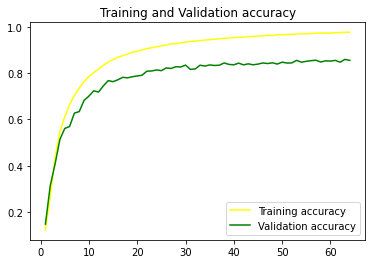

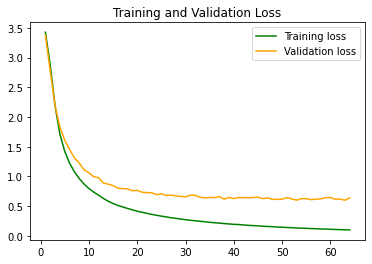

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
num_epochs = range(1,len(acc)+1)
plt.plot(num_epochs , acc , color = 'yellow' , label = 'Training accuracy')
plt.plot(num_epochs , val_acc , color = 'green' , label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(num_epochs , loss , color = 'green' , label = 'Training loss')
plt.plot(num_epochs , val_loss , color = 'orange' , label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [27]:
test_loss , test_accuracy = model.evaluate(x_test_gray,y_test)

12630/12630 [==============================] - 1s 65us/step


In [28]:
print(f"Accuracy on test data {test_accuracy}")

Accuracy on test data 0.8546318411827087


In [29]:
prediction_classes = model.predict_classes(x_test_gray)
true_classes = y_test

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_classes,prediction_classes)

In [33]:
cm

array([[ 31,  27,   0, ...,   0,   0,   0],
       [  4, 667,  35, ...,   0,   0,   0],
       [  0,  51, 662, ...,   2,   0,   0],
       ...,
       [  0,   1,   0, ...,  69,   0,   0],
       [  0,   0,   0, ...,   0,  37,   1],
       [  0,   0,   0, ...,   0,   6,  72]], dtype=int64)

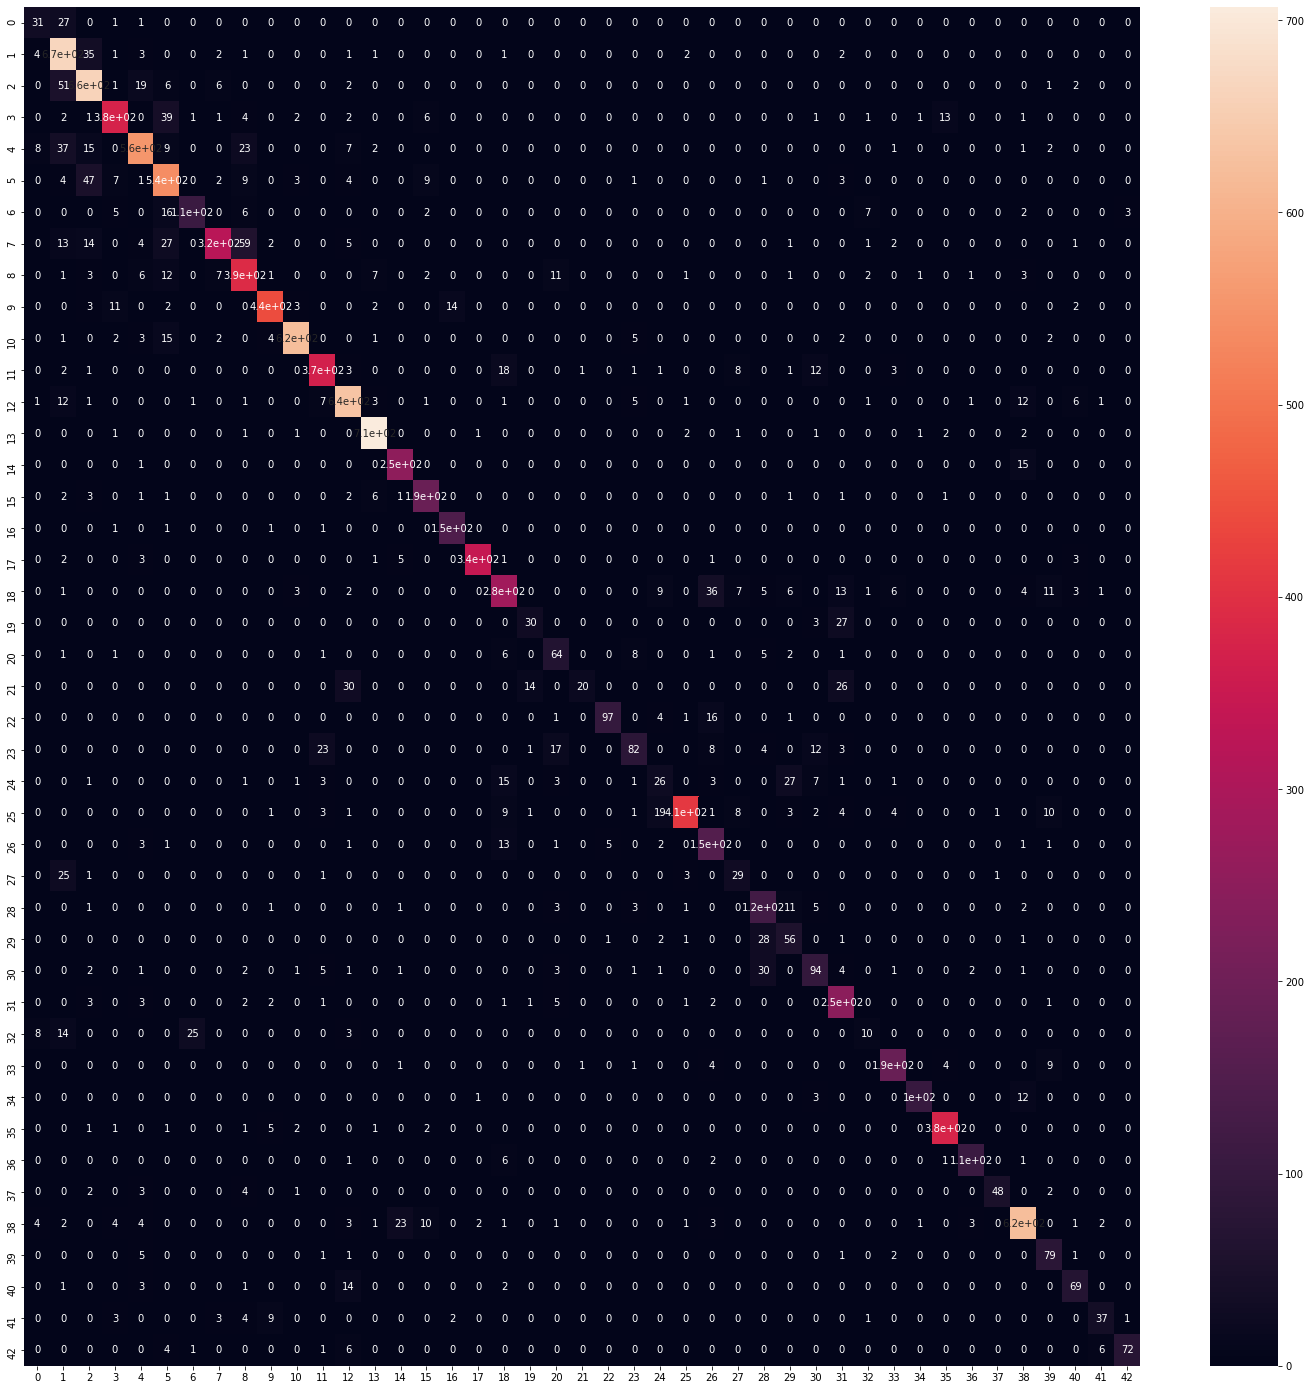

In [35]:
plt.figure(figsize = (25,25))
sns.heatmap(cm ,annot = True)

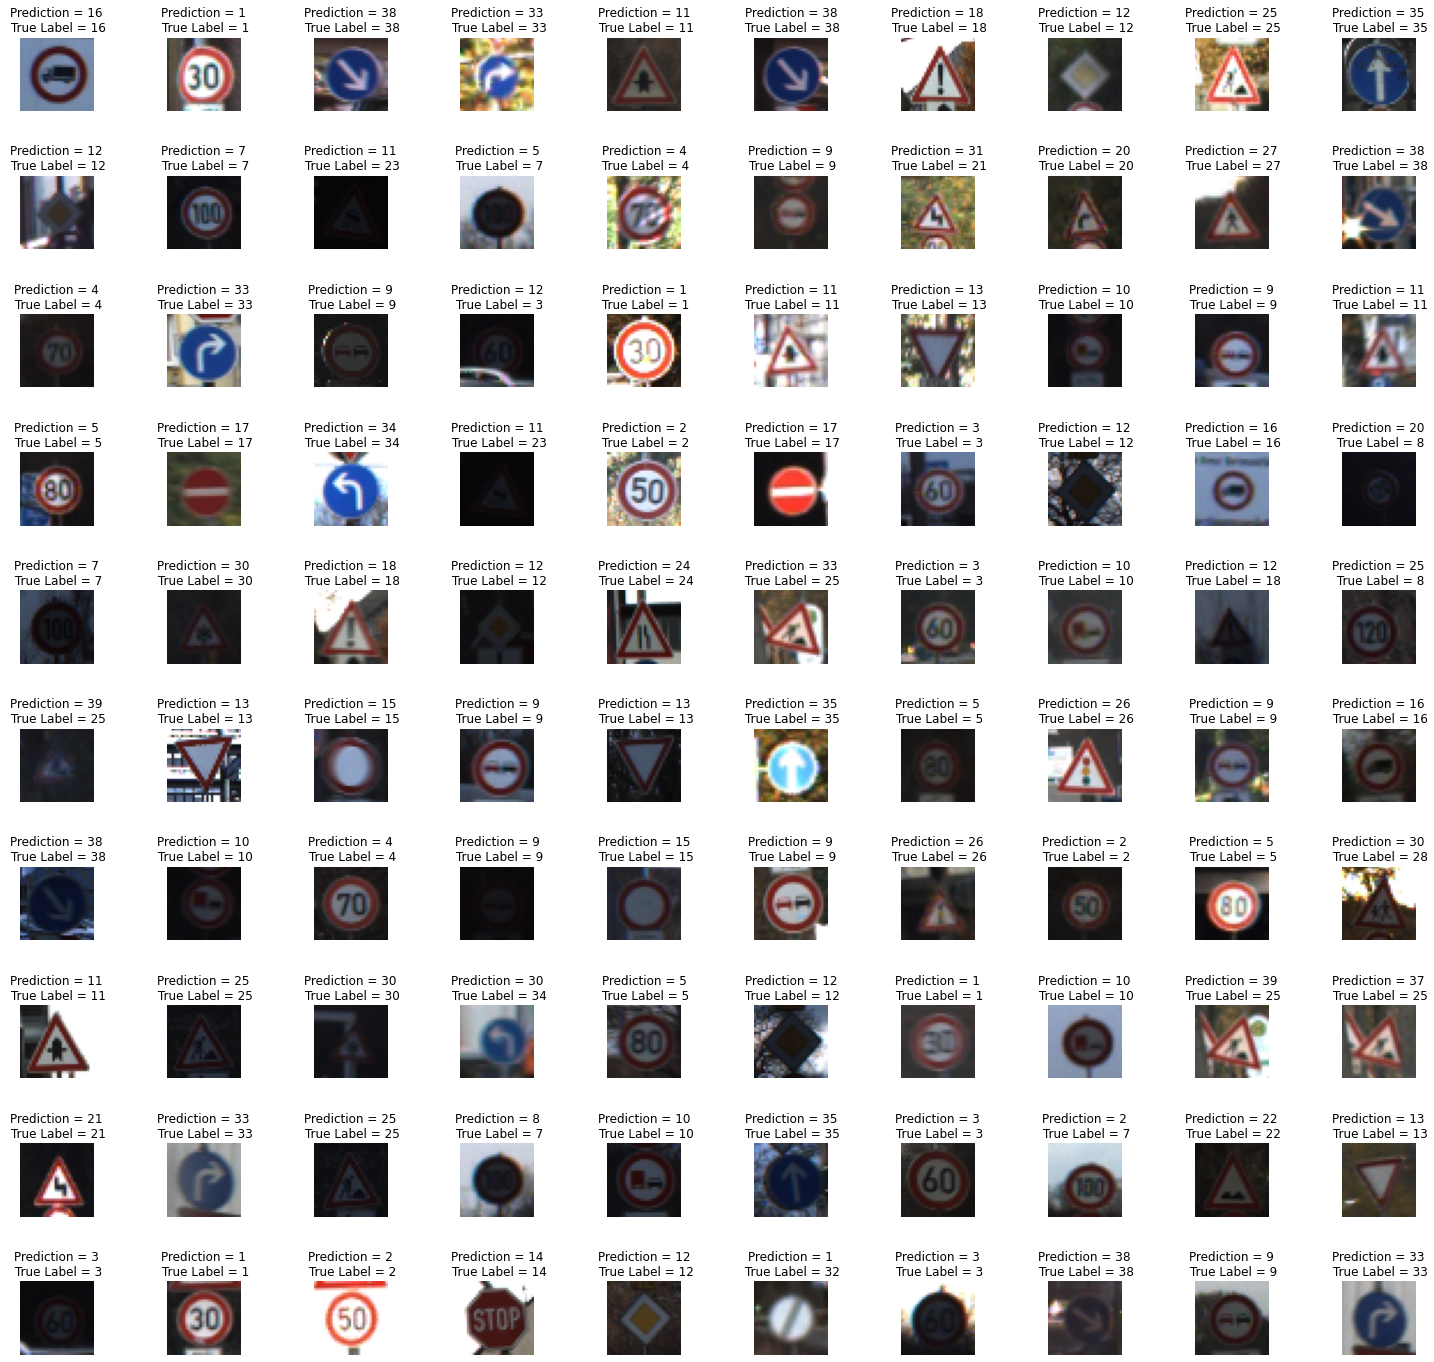

In [51]:
L , W = 10 , 10
fig , axes = plt.subplots(L,W,figsize = (25,25))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True Label = {}'.format(prediction_classes[i],true_classes[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1) 